In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#PASO 1. LEER LA BASE DE DATOS
PP = pd.read_csv('/content/drive/MyDrive/Datas/ADHD-comment.csv')
PP.head()
display(PP)


,body,id,score,created_utc,created_datetime
0,[deleted],c08otkh,1.0,1.239042e+09,2009-04-06 18:18:07
1,If I try to look this up right now I will get ...,c09y8qz,2.0,1.243790e+09,2009-05-31 17:08:19
2,potassium is used as the thing that stops your...,c09yia6,2.0,1.243815e+09,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\n...,c0a81e6,3.0,1.244752e+09,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *d...",c0aixrg,2.0,1.245813e+09,2009-06-24 03:04:51
...,...,...,...,...,...
3356536,&gt;They can’t see how my brain shuts itself d...,gwug5t9,1.0,1.620085e+09,2021-05-03 23:44:24
3356537,"First, congrats, second, you got this!\n\nSo r...",gwug6h0,1.0,1.620085e+09,2021-05-03 23:44:33
3356538,I'm completely the same. I absolutely hate wri...,gwug7do,1.0,1.620085e+09,2021-05-03 23:44:45
3356539,THANK YOU THANK YOU I HAVE SEVERE ADHD TOO AND...,gwug9ko,2.0,1.620086e+09,2021-05-03 23:45:14


Se observa que hay datos duplicados

In [ ]:
PP.id.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3356536    False
3356537    False
3356538    False
3356539    False
3356540     True
Name: id, Length: 3356541, dtype: bool

In [ ]:
PP.groupby('id')['id'].count()

id
c08otkh    1
c09y8qz    1
c09yia6    1
c0a81e6    1
c0aixrg    1
          ..
gwug5et    1
gwug5t9    1
gwug6h0    1
gwug7do    1
gwug9ko    1
Name: id, Length: 2895398, dtype: int64

Disminuye la base al eliminar duplicados

In [ ]:
print(len(PP.id))
print(len(PP.id.unique()))

3356541
2895398


In [ ]:
PP_SD = PP.drop_duplicates(['id'])
display(PP_SD)

,body,id,score,created_utc,created_datetime
0,[deleted],c08otkh,1.0,1.239042e+09,2009-04-06 18:18:07
1,If I try to look this up right now I will get ...,c09y8qz,2.0,1.243790e+09,2009-05-31 17:08:19
2,potassium is used as the thing that stops your...,c09yia6,2.0,1.243815e+09,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\n...,c0a81e6,3.0,1.244752e+09,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *d...",c0aixrg,2.0,1.245813e+09,2009-06-24 03:04:51
...,...,...,...,...,...
3356535,"I completely agree, but it also makes me reall...",gwug5et,1.0,1.620085e+09,2021-05-03 23:44:19
3356536,&gt;They can’t see how my brain shuts itself d...,gwug5t9,1.0,1.620085e+09,2021-05-03 23:44:24
3356537,"First, congrats, second, you got this!\n\nSo r...",gwug6h0,1.0,1.620085e+09,2021-05-03 23:44:33
3356538,I'm completely the same. I absolutely hate wri...,gwug7do,1.0,1.620085e+09,2021-05-03 23:44:45


Se eliminan los de etiqueta deleted

In [ ]:
PP_SDE = PP_SD[PP_SD['body'] == '[deleted]'].index.to_list()
dfADHD = PP_SD.drop(index=(PP_SDE))

display(dfADHD)

,body,id,score,created_utc,created_datetime
1,If I try to look this up right now I will get ...,c09y8qz,2.0,1.243790e+09,2009-05-31 17:08:19
2,potassium is used as the thing that stops your...,c09yia6,2.0,1.243815e+09,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\n...,c0a81e6,3.0,1.244752e+09,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *d...",c0aixrg,2.0,1.245813e+09,2009-06-24 03:04:51
5,"Despite continued controversy, powerful new ev...",c0fjlvp,1.0,1.257783e+09,2009-11-09 16:12:44
...,...,...,...,...,...
3356535,"I completely agree, but it also makes me reall...",gwug5et,1.0,1.620085e+09,2021-05-03 23:44:19
3356536,&gt;They can’t see how my brain shuts itself d...,gwug5t9,1.0,1.620085e+09,2021-05-03 23:44:24
3356537,"First, congrats, second, you got this!\n\nSo r...",gwug6h0,1.0,1.620085e+09,2021-05-03 23:44:33
3356538,I'm completely the same. I absolutely hate wri...,gwug7do,1.0,1.620085e+09,2021-05-03 23:44:45


eliminamos columnas que no sirven para el analisis

In [ ]:
dataset = dfADHD.drop(['id','created_utc'], axis =1)
dataset.head()

,body,score,created_datetime
1,If I try to look this up right now I will get ...,2.0,2009-05-31 17:08:19
2,potassium is used as the thing that stops your...,2.0,2009-06-01 00:07:50
3,I've love a link to anything about this. \n\n...,3.0,2009-06-11 20:25:36
4,"I don't know anything specific, but I would *d...",2.0,2009-06-24 03:04:51
5,"Despite continued controversy, powerful new ev...",1.0,2009-11-09 16:12:44


Se crean columnas de Year y Month

In [ ]:
from datetime import datetime
ss=pd.to_datetime(dataset.created_datetime)
dataset['Year'] = pd.to_datetime(dataset.created_datetime)
dataset['Year'] = dataset['Year'].dt.year
dataset['Month'] = pd.to_datetime(dataset.created_datetime)
dataset['Month'] = dataset['Month'].dt.month
dataset.head()


,body,score,created_datetime,Year,Month
1,If I try to look this up right now I will get ...,2.0,2009-05-31 17:08:19,2009,5
2,potassium is used as the thing that stops your...,2.0,2009-06-01 00:07:50,2009,6
3,I've love a link to anything about this. \n\n...,3.0,2009-06-11 20:25:36,2009,6
4,"I don't know anything specific, but I would *d...",2.0,2009-06-24 03:04:51,2009,6
5,"Despite continued controversy, powerful new ev...",1.0,2009-11-09 16:12:44,2009,11


In [ ]:
Se analizan los comentarios por year

<Axes: ylabel='Year'>

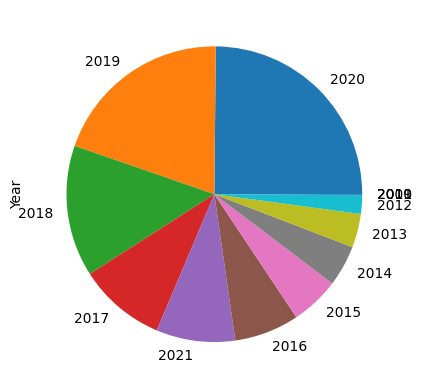

In [ ]:
dataset.Year.value_counts().plot(kind='pie')

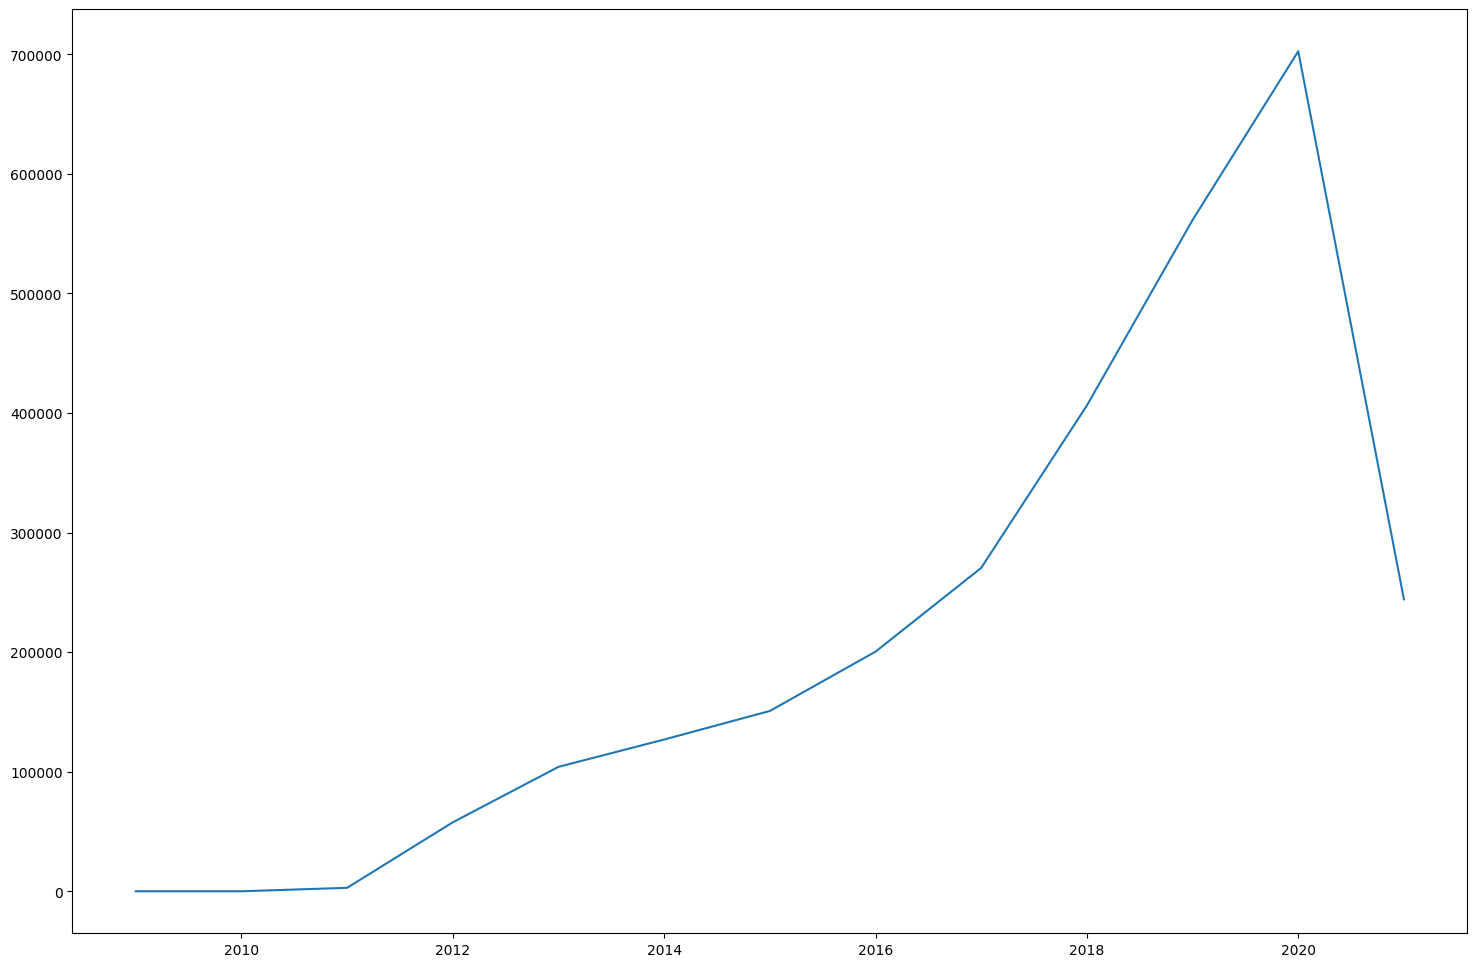

In [ ]:
plt.figure(figsize=(18,12))
plt.plot(dataset.groupby("Year")["Year"].count())
plt.show()

Limpeza de caracteres especiales

In [ ]:
import re

# Define a function to clean the text
def clean(body):
    # Removes all special characters and numericals leaving the alphabets
    body = re.sub('[^A-Za-z]+', ' ', body)
    return body

# Cleaning the text in the review column
dataset['Cleaned Body'] = dataset['body'].apply(clean)
dataset.head()

,body,score,created_datetime,Year,Month,Cleaned Body
1,If I try to look this up right now I will get ...,2.0,2009-05-31 17:08:19,2009,5,If I try to look this up right now I will get ...
2,potassium is used as the thing that stops your...,2.0,2009-06-01 00:07:50,2009,6,potassium is used as the thing that stops your...
3,I've love a link to anything about this. \n\n...,3.0,2009-06-11 20:25:36,2009,6,I ve love a link to anything about this I have...
4,"I don't know anything specific, but I would *d...",2.0,2009-06-24 03:04:51,2009,6,I don t know anything specific but I would def...
5,"Despite continued controversy, powerful new ev...",1.0,2009-11-09 16:12:44,2009,11,Despite continued controversy powerful new evi...


In [ ]:
#Nos quedamos con mayo del 2019

Y = dataset[dataset['Year'] != 2019].index.to_list()
datasetM19 = dataset.drop(index=(Y))
M = datasetM19[datasetM19['Month'] != 5].index.to_list()
datasetM19 = datasetM19.drop(index=(M))
len(datasetM19)
datasetM19

,body,score,created_datetime,Year,Month,Cleaned Body
1996804,I've been where you are as well. It started wi...,3.0,2019-05-01 00:00:21,2019,5,I ve been where you are as well It started wit...
1996805,"I’m 26, diagnosed at 22. It had occurred to me...",2.0,2019-05-01 00:00:31,2019,5,I m diagnosed at It had occurred to me for awh...
1996806,protip: Gabor Mate is a hack. He has produced ...,1.0,2019-05-01 00:01:50,2019,5,protip Gabor Mate is a hack He has produced ex...
1996807,Holy crap I didn't know I was doing this haha,5.0,2019-05-01 00:01:52,2019,5,Holy crap I didn t know I was doing this haha
1996808,That’s me on my drives home,1.0,2019-05-01 00:02:32,2019,5,That s me on my drives home
...,...,...,...,...,...,...
2045776,I would start by talking to the doctor first. ...,2.0,2019-05-31 23:53:23,2019,5,I would start by talking to the doctor first T...
2045777,Happy anniversary!,6.0,2019-05-31 23:54:52,2019,5,Happy anniversary
2045778,It was thanks to meeting someone who was very ...,1.0,2019-05-31 23:59:04,2019,5,It was thanks to meeting someone who was very ...
2045779,Older than that! The first time an ADHD-like ...,2.0,2019-05-31 23:59:08,2019,5,Older than that The first time an ADHD like di...


In [ ]:
#Nos quedamos con mayo del 2020

Y = dataset[dataset['Year'] != 2020].index.to_list()
datasetM20 = dataset.drop(index=(Y))
M = datasetM20[datasetM20['Month'] != 5].index.to_list()
datasetM20 = datasetM20.drop(index=(M))
len(datasetM20)
datasetM20

,body,score,created_datetime,Year,Month,Cleaned Body
2576374,I can relate... My first bike lock was 2615......,3.0,2020-05-01 00:01:00,2020,5,I can relate My first bike lock was I have no ...
2576375,And what's crazy is people will take 100mg ill...,2.0,2020-05-01 00:01:33,2020,5,And what s crazy is people will take mg illega...
2576376,bad spelling could be a spelling disorder if y...,1.0,2020-05-01 00:01:41,2020,5,bad spelling could be a spelling disorder if y...
2576377,Honestly I would say yes! I’m currently in the...,1.0,2020-05-01 00:05:23,2020,5,Honestly I would say yes I m currently in the ...
2576378,"Hey,\n\nI was exactly having that with Ritalin...",1.0,2020-05-01 00:05:26,2020,5,Hey I was exactly having that with Ritaline LA...
...,...,...,...,...,...,...
2632752,Cool thing about CS is you don't need a degree...,1.0,2020-05-31 23:52:50,2020,5,Cool thing about CS is you don t need a degree...
2632753,Sway my legs at half a second oscillations.,1.0,2020-05-31 23:54:01,2020,5,Sway my legs at half a second oscillations
2632754,I'm 25 and my mom still tells me to stop the w...,1.0,2020-05-31 23:55:34,2020,5,I m and my mom still tells me to stop the wash...
2632755,That's pretty much it when you're just startin...,1.0,2020-05-31 23:56:43,2020,5,That s pretty much it when you re just startin...


In [ ]:


import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}




def token_stop_pos(body):
    tags = pos_tag(word_tokenize(body))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:


datasetM19['POS tagged'] = datasetM19['Cleaned Body'].apply(token_stop_pos)
datasetM19['Lemma'] = datasetM19['POS tagged'].apply(lemmatize)
datasetM20['POS tagged'] = datasetM20['Cleaned Body'].apply(token_stop_pos)
datasetM20['Lemma'] = datasetM20['POS tagged'].apply(lemmatize)


In [ ]:


datasetM19[['body', 'Lemma']]


,body,Lemma
1996804,I've been where you are as well. It started wi...,well start fail uni realize year school way ...
1996805,"I’m 26, diagnosed at 22. It had occurred to me...",diagnose occur awhile get test might ADHD un...
1996806,protip: Gabor Mate is a hack. He has produced ...,protip Gabor Mate hack produce exactly zero ...
1996807,Holy crap I didn't know I was doing this haha,Holy crap know haha
1996808,That’s me on my drives home,drive home
...,...,...
2045776,I would start by talking to the doctor first. ...,would start talk doctor first last thing nee...
2045777,Happy anniversary!,Happy anniversary
2045778,It was thanks to meeting someone who was very ...,thanks meet someone vocal adhd post adhd mem...
2045779,Older than that! The first time an ADHD-like ...,Older first time ADHD like disorder identify...


In [ ]:

datasetM20[['body', 'Lemma']]

,body,Lemma
2576374,I can relate... My first bike lock was 2615......,relate first bike lock idea happen probably ...
2576375,And what's crazy is people will take 100mg ill...,crazy people take mg illegally fun
2576376,bad spelling could be a spelling disorder if y...,bad spelling could spelling disorder cant im...
2576377,Honestly I would say yes! I’m currently in the...,Honestly would say yes currently process res...
2576378,"Hey,\n\nI was exactly having that with Ritalin...",Hey exactly Ritaline LA x mg mg sometimes mg...
...,...,...
2632752,Cool thing about CS is you don't need a degree...,Cool thing CS need degree CS job Cool thing ...
2632753,Sway my legs at half a second oscillations.,Sway leg half second oscillation
2632754,I'm 25 and my mom still tells me to stop the w...,mom still tell stop washing machine get clot...
2632755,That's pretty much it when you're just startin...,pretty much start describe Especially starte...


TEXTBLOB

In [ ]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_dataM19 = pd.DataFrame(datasetM19[['body', 'Lemma']])
fin_dataM20 = pd.DataFrame(datasetM20[['body', 'Lemma']])

In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_dataM19['Polarity'] = fin_dataM19['Lemma'].apply(getPolarity)
fin_dataM19['Analysis'] = fin_dataM19['Polarity'].apply(analysis)

fin_dataM20['Polarity'] = fin_dataM20['Lemma'].apply(getPolarity)
fin_dataM20['Analysis'] = fin_dataM20['Polarity'].apply(analysis)


In [ ]:
tb_countsM19 = fin_dataM19.Analysis.value_counts()
tb_countsM19
tb_countsM20 = fin_dataM20.Analysis.value_counts()
print(tb_countsM20, tb_countsM19)

Positive    32892
Negative    12399
Neutral     10731
Name: Analysis, dtype: int64 Positive    27875
Negative    11579
Neutral      9452
Name: Analysis, dtype: int64


([<matplotlib.patches.Wedge at 0x7ff1e2e2a920>,
 [Text(-0.23985964453910663, 1.0735303213796867, 'Positive'),
  Text(-0.41551101425501735, -1.0185040977005282, 'Negative'),
  Text(1.1087078137620434, -0.7702382642422994, 'Neutral')],
 [Text(-0.13083253338496723, 0.5855619934798291, '57.0%'),
  Text(-0.2266423714118276, -0.5555476896548335, '23.7%'),
  Text(0.6980752901464717, -0.48496483304144766, '19.3%')])

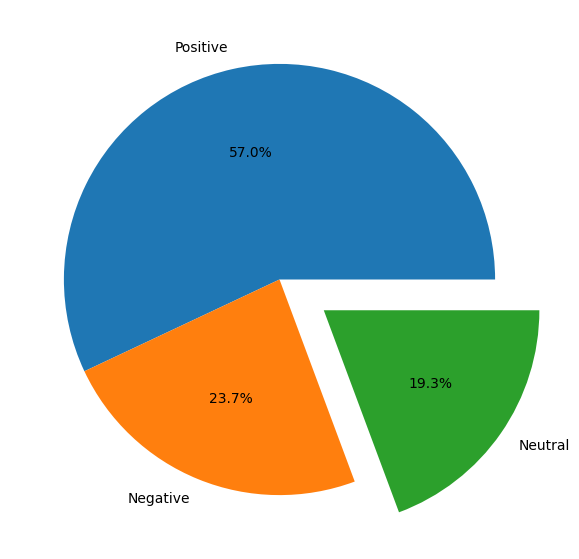

In [ ]:

%matplotlib inline

tb_countM19= fin_dataM19.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_countsM19.values, labels = tb_countsM19.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


([<matplotlib.patches.Wedge at 0x7ff1e317d840>,
 [Text(-0.2973420043679677, 1.0590503918314933, 'Positive'),
  Text(-0.35442294424871484, -1.0413377821773646, 'Negative'),
  Text(1.1128511427846326, -0.7642397097789001, 'Neutral')],
 [Text(-0.16218654783707326, 0.5776638500899054, '58.7%'),
  Text(-0.19332160595384443, -0.5680024266421988, '22.1%'),
  Text(0.7006840528643983, -0.48118796541634445, '19.2%')])

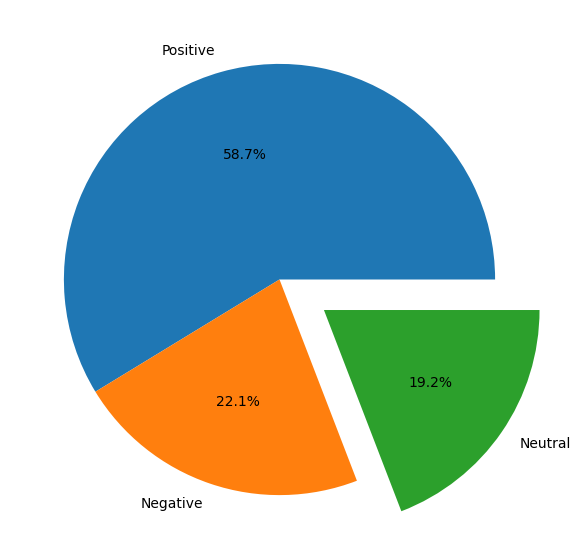

In [ ]:
tb_countM20= fin_dataM20.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_countsM20.values, labels = tb_countsM20.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


VADER

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_dataM19['Vader Sentiment'] = fin_dataM19['Lemma'].apply(vadersentimentanalysis)
fin_dataM20['Vader Sentiment'] = fin_dataM20['Lemma'].apply(vadersentimentanalysis)

In [ ]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'



In [ ]:
fin_dataM19['Vader_Analysis'] = fin_dataM19['Vader Sentiment'].apply(vader_analysis)
fin_dataM19.head()

,body,Lemma,Polarity,Analysis,Vader Sentiment,Vader_Analysis
1996804,I've been where you are as well. It started wi...,well start fail uni realize year school way ...,-0.009382,Negative,0.8519,Positive
1996805,"I’m 26, diagnosed at 22. It had occurred to me...",diagnose occur awhile get test might ADHD un...,0.115997,Positive,0.8958,Positive
1996806,protip: Gabor Mate is a hack. He has produced ...,protip Gabor Mate hack produce exactly zero ...,0.325000,Positive,0.0000,Neutral
1996807,Holy crap I didn't know I was doing this haha,Holy crap know haha,-0.300000,Negative,0.1027,Neutral
1996808,That’s me on my drives home,drive home,0.000000,Neutral,0.0000,Neutral


In [ ]:
fin_dataM20['Vader_Analysis'] = fin_dataM20['Vader Sentiment'].apply(vader_analysis)
fin_dataM20.head()

,body,Lemma,Polarity,Analysis,Vader Sentiment,Vader_Analysis
2576374,I can relate... My first bike lock was 2615......,relate first bike lock idea happen probably ...,0.250000,Positive,0.6124,Positive
2576375,And what's crazy is people will take 100mg ill...,crazy people take mg illegally fun,-0.150000,Negative,0.2263,Neutral
2576376,bad spelling could be a spelling disorder if y...,bad spelling could spelling disorder cant im...,-0.700000,Negative,-0.8227,Negative
2576377,Honestly I would say yes! I’m currently in the...,Honestly would say yes currently process res...,0.240909,Positive,0.9734,Positive
2576378,"Hey,\n\nI was exactly having that with Ritalin...",Hey exactly Ritaline LA x mg mg sometimes mg...,0.028686,Positive,0.9819,Positive


In [ ]:
vader_countsM19 = fin_dataM19.Vader_Analysis.value_counts()
vader_countsM20 = fin_dataM20.Vader_Analysis.value_counts()
print(vader_countsM19)
print(vader_countsM20)

Neutral     23583
Positive    19442
Negative     5881
Name: Vader_Analysis, dtype: int64
Neutral     25853
Positive    24268
Negative     5901
Name: Vader_Analysis, dtype: int64


([<matplotlib.patches.Wedge at 0x7ff1e2a22440>,
 [Text(0.06702885546387126, 1.1981265094034117, 'Neutral'),
  Text(-0.4622206931234396, -0.9981743489233168, 'Positive'),
  Text(1.0224344032331967, -0.40574362728843566, 'Negative')],
 [Text(0.039100165687258236, 0.6989071304853235, '48.2%'),
  Text(-0.2521203780673307, -0.5444587357763545, '39.8%'),
  Text(0.5576914926726527, -0.22131470579369214, '12.0%')])

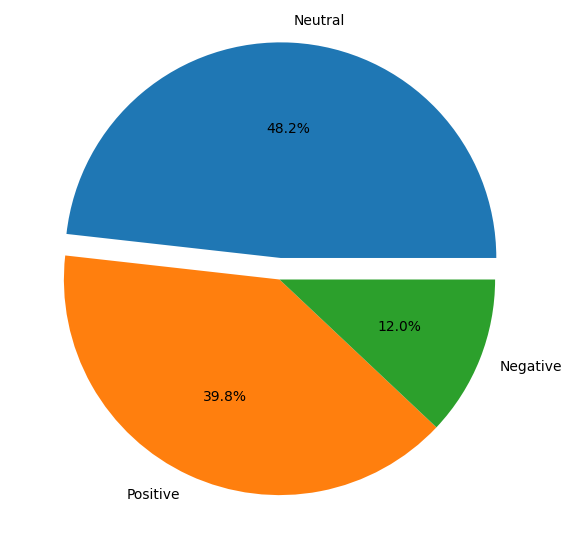

In [ ]:
vader_countsM19= fin_dataM19['Vader_Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_countsM19.values, labels = vader_countsM19.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)




([<matplotlib.patches.Wedge at 0x7ff1e2a69510>,
 [Text(0.14486495198239216, 1.1912238016792394, 'Neutral'),
  Text(-0.4803741313997744, -0.9895659118431235, 'Positive'),
  Text(1.040319860798422, -0.3573997582936397, 'Negative')],
 [Text(0.08450455532306207, 0.6948805509795561, '46.1%'),
  Text(-0.262022253490786, -0.5397632246417037, '43.3%'),
  Text(0.5674471967991392, -0.19494532270562162, '10.5%')])

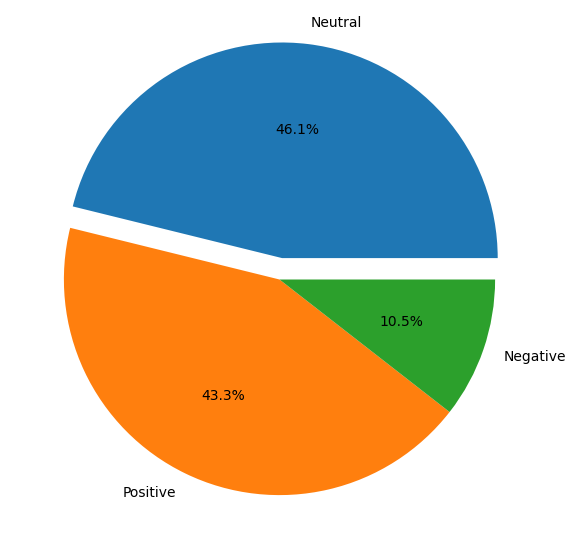

In [ ]:

vader_countsM20= fin_dataM20['Vader_Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_countsM20.values, labels = vader_countsM20.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)


SentiWordNet

In [ ]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue

        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return "Neutral"
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_dataM19['SWN_analysis'] = datasetM19['POS tagged'].apply(sentiwordnetanalysis)
fin_dataM20['SWN_analysis'] = datasetM20['POS tagged'].apply(sentiwordnetanalysis)


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [ ]:
swn_countsM19= fin_dataM19['SWN_analysis'].value_counts()
swn_countsM20= fin_dataM20['SWN_analysis'].value_counts()
print(swn_countsM19)
print(swn_countsM20)

Positive    29667
Negative    12478
Neutral      6761
Name: SWN_analysis, dtype: int64
Positive    34863
Negative    13507
Neutral      7652
Name: SWN_analysis, dtype: int64


Index(['Positive', 'Negative', 'Neutral'], dtype='object')


([<matplotlib.patches.Wedge at 0x7ff1d835b820>,
 [Text(-0.3944477746089573, 1.1333185576465432, 'Positive'),
  Text(-0.1091329481466661, -1.0945729759266019, 'Negative'),
  Text(0.9978771598177479, -0.4628619382862075, 'Neutral')],
 [Text(-0.2300945351885584, 0.6611024919604835, '60.7%'),
  Text(-0.05952706262545423, -0.5970398050508736, '25.5%'),
  Text(0.5442966326278624, -0.25247014815611313, '13.8%')])

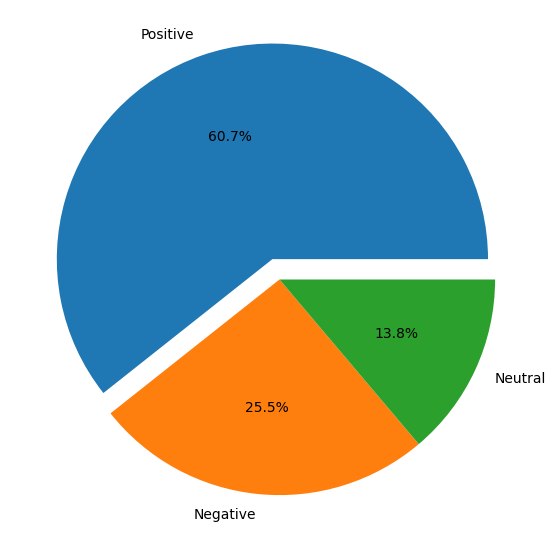

In [ ]:
swn_countsM19= fin_dataM19.SWN_analysis.value_counts()
print(swn_countsM19.index)
plt.figure(figsize=(10, 7))
plt.pie(swn_countsM19.values, labels = swn_countsM19.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)


Index(['Positive', 'Negative', 'Neutral'], dtype='object')


([<matplotlib.patches.Wedge at 0x7ff1d83b6f20>,
 [Text(-0.44983152853509734, 1.1124979082837765, 'Positive'),
  Text(-0.04933196792122456, -1.0988932418306245, 'Negative'),
  Text(1.0002711320234159, -0.45766544816120247, 'Neutral')],
 [Text(-0.26240172497880676, 0.6489571131655363, '62.2%'),
  Text(-0.026908346138849758, -0.5993963137257952, '24.1%'),
  Text(0.5456024356491359, -0.2496356989970195, '13.7%')])

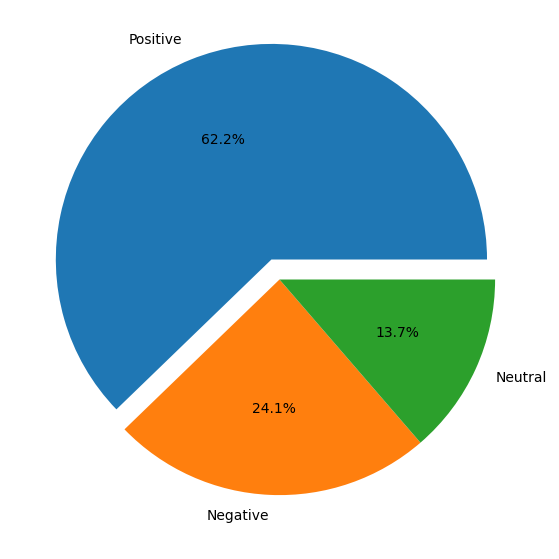

In [ ]:
swn_countsM20= fin_dataM20.SWN_analysis.value_counts()
print(swn_countsM20.index)
plt.figure(figsize=(10, 7))
plt.pie(swn_countsM20.values, labels = swn_countsM20.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)


([<matplotlib.patches.Wedge at 0x7ff1d82af040>,
 [Text(-0.3615771267248775, 1.0388753445093313, 'Positive'),
  Text(-0.1091329481466661, -1.0945729759266019, 'Negative'),
  Text(1.2246674234126906, -0.5680578333512546, 'Neutral')],
 [Text(-0.19722388730447862, 0.5666592788232716, '60.7%'),
  Text(-0.05952706262545423, -0.5970398050508736, '25.5%'),
  Text(0.7710868962228051, -0.35766604322116025, '13.8%')])

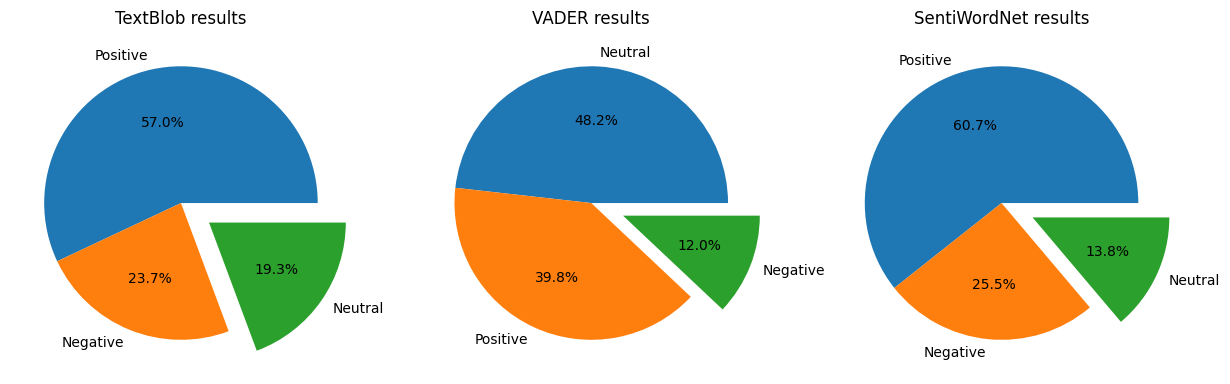

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_countsM19.values, labels = tb_countsM19.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_countsM19.values, labels = vader_countsM19.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_countsM19.values, labels = swn_countsM19.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x7ff1d81bbd30>,
 [Text(-0.41234556782383924, 1.0197897492601284, 'Positive'),
  Text(-0.04933196792122456, -1.0988932418306245, 'Negative'),
  Text(1.2276054802105558, -0.5616803227432939, 'Neutral')],
 [Text(-0.22491576426754864, 0.5562489541418882, '62.2%'),
  Text(-0.026908346138849758, -0.5993963137257952, '24.1%'),
  Text(0.7729367838362758, -0.353650573579111, '13.7%')])

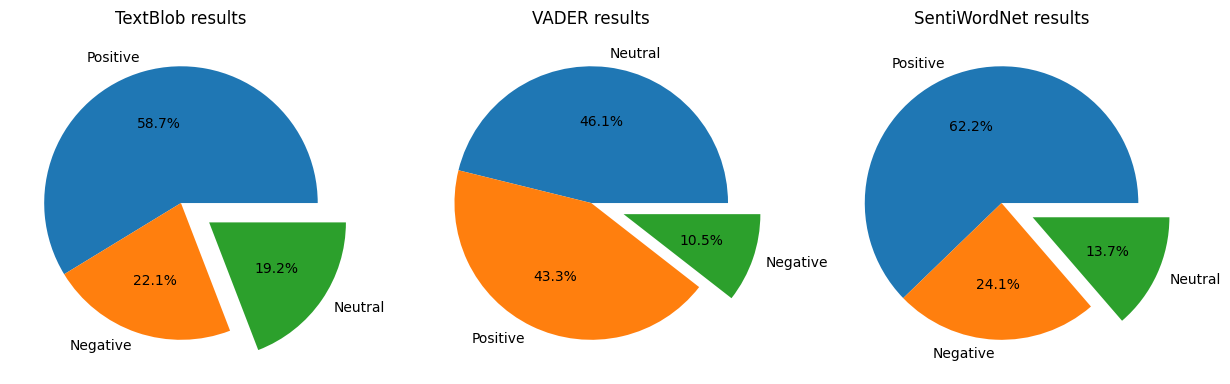

In [ ]:

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_countsM20.values, labels = tb_countsM20.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_countsM20.values, labels = vader_countsM20.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_countsM20.values, labels = swn_countsM20.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
fin_dataM19.head()

,body,Lemma,Polarity,Analysis,Vader Sentiment,Vader_Analysis,SWN_analysis
1996804,I've been where you are as well. It started wi...,well start fail uni realize year school way ...,-0.009382,Negative,0.8519,Positive,Positive
1996805,"I’m 26, diagnosed at 22. It had occurred to me...",diagnose occur awhile get test might ADHD un...,0.115997,Positive,0.8958,Positive,Positive
1996806,protip: Gabor Mate is a hack. He has produced ...,protip Gabor Mate hack produce exactly zero ...,0.325000,Positive,0.0000,Neutral,Positive
1996807,Holy crap I didn't know I was doing this haha,Holy crap know haha,-0.300000,Negative,0.1027,Neutral,Negative
1996808,That’s me on my drives home,drive home,0.000000,Neutral,0.0000,Neutral,Neutral


In [ ]:
fin_dataM19[fin_dataM19['Analysis'] == 'Positive']

,body,Lemma,Polarity,Analysis,Vader Sentiment,Vader_Analysis,SWN_analysis
1996805,"I’m 26, diagnosed at 22. It had occurred to me...",diagnose occur awhile get test might ADHD un...,0.115997,Positive,0.8958,Positive,Positive
1996806,protip: Gabor Mate is a hack. He has produced ...,protip Gabor Mate hack produce exactly zero ...,0.325000,Positive,0.0000,Neutral,Positive
1996809,Why buy water bottles? It might unconsciously ...,buy water bottle might unconsciously make av...,0.100000,Positive,-0.6124,Negative,Positive
1996812,I see. Thanks for talking about it!,see Thanks talk,0.200000,Positive,0.4404,Neutral,Positive
1996813,"Ha! Okay, I got a chuckle out of that.\n\nBut ...",Ha Okay get chuckle one note help attach thi...,0.050000,Positive,0.8316,Positive,Positive
...,...,...,...,...,...,...,...
2045774,Thank you much,Thank much,0.200000,Positive,0.3612,Neutral,Positive
2045776,I would start by talking to the doctor first. ...,would start talk doctor first last thing nee...,0.058333,Positive,-0.1280,Neutral,Positive
2045777,Happy anniversary!,Happy anniversary,0.800000,Positive,0.5719,Positive,Positive
2045779,Older than that! The first time an ADHD-like ...,Older first time ADHD like disorder identify...,0.208333,Positive,-0.0516,Neutral,Positive
